<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/stockmarketML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install --upgrade tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np

# import dataset
fb_complete_data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/META_data.csv")

In [4]:
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [5]:
#filtering open column
fb_training_processed = fb_complete_data[['Open']].values

len(fb_training_processed)

1257

In [6]:
# scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
# still not entirely sure what the MinMaxScaler does but it essentially is placing the value as a decimal on a range between 0 and 1 representing where it is in comparison to other values
fb_training_scaled = scaler.fit_transform(fb_training_processed)

len(fb_training_scaled)

1257

In [7]:
fb_training_features = []
fb_training_labels = []


for i in range(60,len(fb_training_scaled)):
  fb_training_features.append(fb_training_scaled[i-60:i,0])
  fb_training_labels.append(fb_training_scaled[i,0])

In [8]:
# Converting data into numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

print(X_train.shape, y_train.shape)




(1197, 60) (1197,)


In [9]:
# Converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [10]:
# importing packages, need to learn what some of them mean
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [11]:
# defining the LSTM network
# 4 LSTM layers with 100 nnodes each
# There is a dropout layer to avoid overfitting-- this is done through random dropping of 20% of the variables
# Adam optimizer is a "stochastic gradient descent" which is a way to reduce computing power to find the "minimum value" in a large neural network
input_layer = Input(shape = (X_train.shape[1],1))
lstm1 = LSTM(100, activation = 'relu', return_sequences=True)(input_layer)

do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation = 'relu', return_sequences= True)(do1)

do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation = 'relu', return_sequences = True)(do2)

do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation = 'relu')(do3)

do4 = Dropout(0.2)(lstm4)


output_layer = Dense(1)(do4)
model = Model(input_layer,output_layer)
model.compile(optimizer = 'adam', loss=  'mse')

In [12]:
# Converting the output y into a column vector

print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [31]:
# Training the model... this should train the stock prediction on what is in the training shape

model_history = model.fit(X_train, y_train, epochs = 100, verbose = 1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 227ms/step - loss: 0.0023
Epoch 2/100
38/38 [==============================] - 11s 282ms/step - loss: 0.0026
Epoch 3/100
38/38 [==============================] - 10s 267ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 9s 233ms/step - loss: 0.0024
Epoch 5/100
38/38 [==============================] - 10s 254ms/step - loss: 0.0025
Epoch 6/100
38/38 [==============================] - 10s 267ms/step - loss: 0.0022
Epoch 7/100
38/38 [==============================] - 9s 241ms/step - loss: 0.0023
Epoch 8/100
38/38 [==============================] - 10s 249ms/step - loss: 0.0024
Epoch 9/100
38/38 [==============================] - 10s 265ms/step - loss: 0.0025
Epoch 10/100
38/38 [==============================] - 9s 229ms/step - loss: 0.0024
Epoch 11/100
38/38 [==============================] - 10s 254ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 10s 268ms/step - loss: 0.0023
Epoch

In [32]:
# Testing the model
fb_testing_complete_data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/META_test.csv")
fb_testing_processed = fb_testing_complete_data[['Open']].values

In [33]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis = 0)

In [34]:
test_inputs = fb_all_data[len(fb_all_data)- len(fb_testing_complete_data) - 60: ].values
print(test_inputs.shape)

(80,)


In [35]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [36]:
# Divide testing data into labels and features
fb_test_features = []
for i in range(60,80):
  fb_test_features.append(test_inputs[i-60:i,0])


In [37]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [38]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
print(X_test.shape)

(20, 60, 1)


In [39]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


In [40]:
y_pred = scaler.inverse_transform(y_pred)

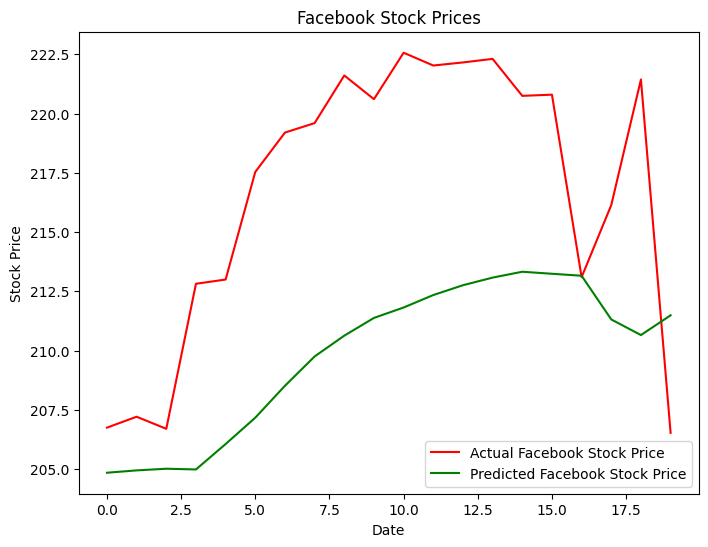

In [41]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facebook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()